In [1]:
# PRE-INTERVIEW PROJECRT: Online Retail Exploratory Data Analysis

In [2]:
# Overview
# In this project, interpreting data to help make a key business decision.

In [3]:
# Project Objectives:
# Describe data to answer key questions to uncover insights.
# Gain valuable insights that will help improve online retail performance.
# Provide analytic insights and data-driven recommendations.

In [4]:
# The dataset contains the following columns:

# InvoiceNo: Invoice number of the transaction
# StockCode: Unique product code
# Description: product Description
# Quantity: Quantity of the product
# InvoiceDate: Date/time of the transaction
# UnitPrice: unit product price
# CustomerID: Unique customer ID
# Country: Country where the transaction occurred

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('OnlineRetail.csv')

In [7]:
# understanding the data
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
data.shape

(541909, 9)

In [10]:
data.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [11]:
data.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
data.nunique()

Unnamed: 0     541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [13]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [14]:
# cleaning the data:
data.isnull().sum()

Unnamed: 0          0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
newdata = data.drop(['InvoiceNo', 'StockCode'], axis = 1)

In [18]:
newdata.head()

,Unnamed: 0,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# removing columns with missing values:


In [26]:
# calculating mean. median, mode for Qunatity:
mean_Quantity = newdata['Quantity'].mean()
median_Quantity = newdata['Quantity'].median()U
print(mean_Quantity)
print(median_Quantity)

12.06130339774205
5.0


In [27]:
# calculating mean. median, mode for UnitPrice:
mean_UnitPrice = newdata['UnitPrice'].mean()
median_UnitPrice = newdata['UnitPrice'].median()
print(mean_UnitPrice)
print(median_UnitPrice)

3.460471018536043
1.95


In [29]:
# Difference in max and min for Quantity
range_Quantity = data["Quantity"].max() - data["Quantity"].min()
print(range_Quantity)
# Difference in max and min for UnitPrice
range_UnitPrice = data["UnitPrice"].max() - data["UnitPrice"].min()
print(range_UnitPrice)

161990
38970.0


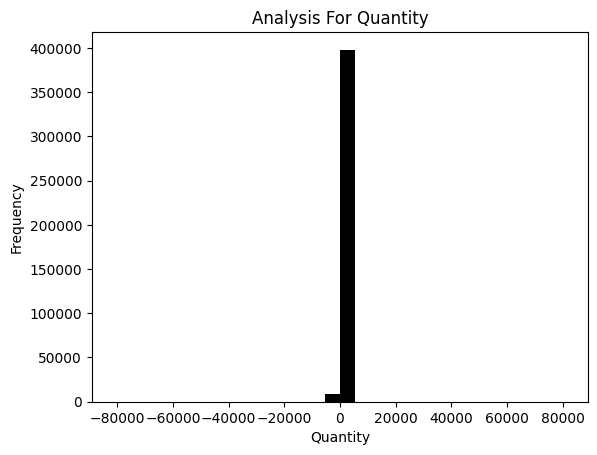

In [32]:
# Graph Representing the Quantity:
plt.hist(data['Quantity'], bins= 30, color='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Analysis For Quantity')
plt.show()


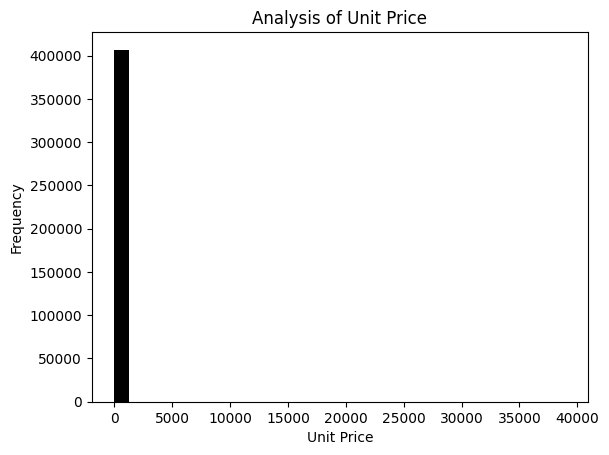

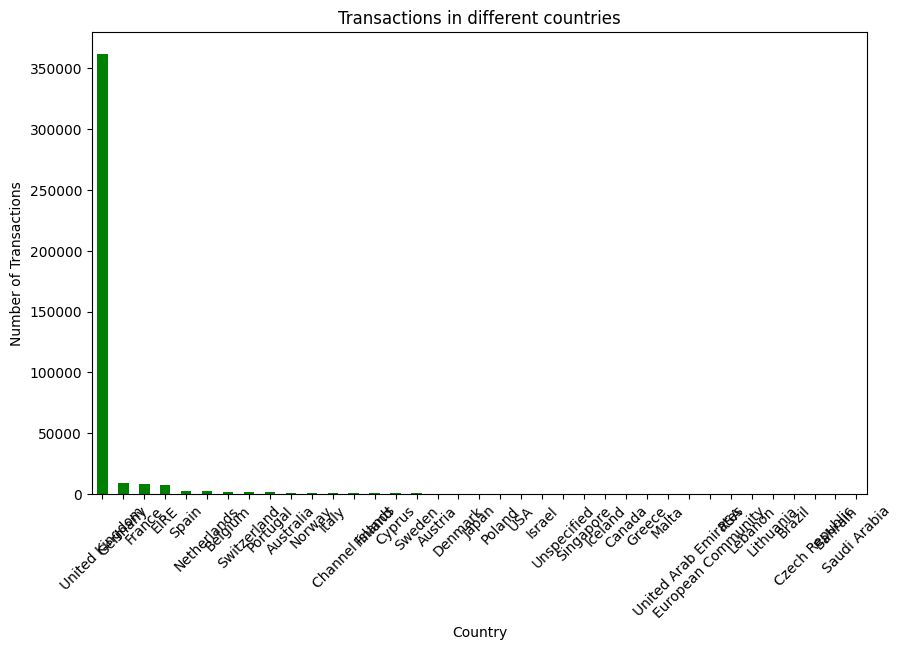

In [36]:
# Graph Representing the UnitPrice:
plt.hist(data['UnitPrice'], bins=30, color='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Analysis of Unit Price')
plt.show()

# bar graph representing transaction in different countries:
country_counts = data['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Transactions in different countries')
plt.xticks(rotation=45)
plt.show()

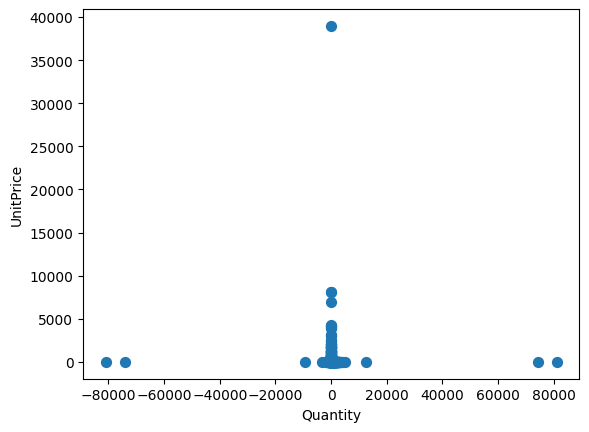

In [38]:
# relation between Quantity and UnitPrice:
data.plot(kind="scatter", x="Quantity", y="UnitPrice", s=50)
plt.show()